### Exploring technical features from the machine learning for trading book

In [58]:
import talib as ta
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from data import OHLCVData


### Loading in some data

In [24]:
ticker = '^GSPC'
data = OHLCVData.from_yahoo_finance(ticker = ticker, name = 'S&P 500')

close_series = data.get_series(column_name='Close')

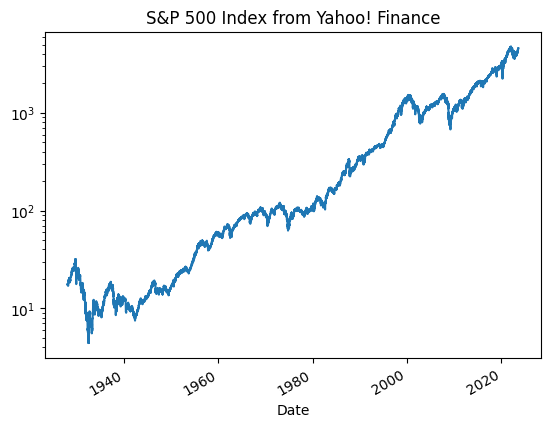

In [5]:
data.get_series(column_name='Close').plot()
plt.yscale("log")
plt.title("S&P 500 Index from Yahoo! Finance")
plt.show()

### Relative Strength Index

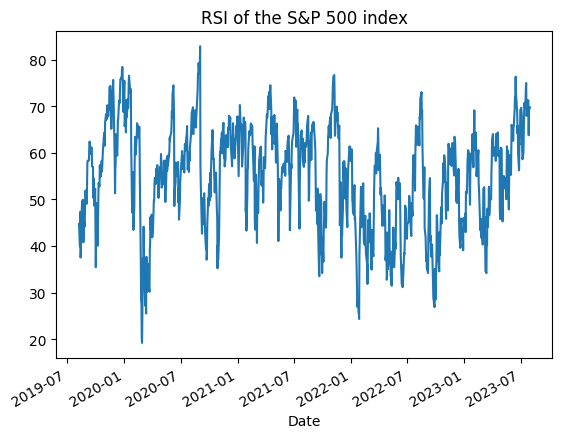

In [26]:
rsi = ta.RSI(close_series)

rsi.iloc[-1000:].plot()
plt.title("RSI of the S&P 500 index")
plt.show()

### Bollinger Bands Features

In [27]:
upper_band, middle_band, lower_band = ta.BBANDS(close_series, timeperiod = 20, nbdevup = 2, nbdevdn = 2)

In [30]:
bbands_df = pd.concat([upper_band, middle_band, lower_band, close_series], axis = 1)
bbands_df.columns = ['upper', 'middle', 'lower', 'close']

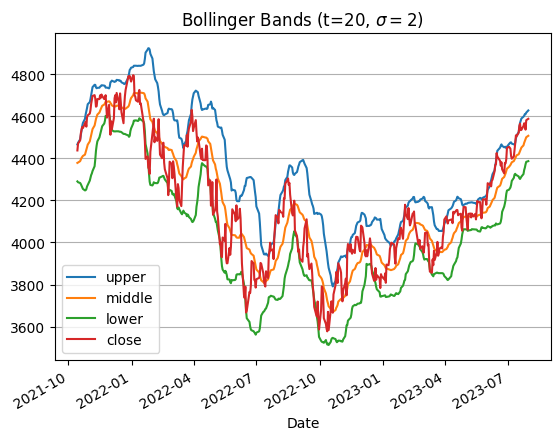

In [34]:
bbands_df.iloc[-450:].plot()
plt.title("Bollinger Bands (t=20, $\sigma=2$)")
plt.grid(axis = 'y')
plt.show()

We can be creative around the features that we use from this. The Bollinger bands tell us things in price terms but are useful in letting us know how far we are within some type of channel. Things that we can do to normalize this: 
* Take the ratio of the close price to the higher bollinger band 
* Take the ratio of the close price to the lower band 
* Figure out the value of close - high / (high - low) --> basically how far are we within this channel
* Take the size of the channel itself normalized to the middle band value


In [46]:
bbands_df['upper_ratio'] = bbands_df['upper'].sub(bbands_df['close']).div(bbands_df['close'])
bbands_df['lower_ratio'] = bbands_df['close'].sub(bbands_df['lower']).div(bbands_df['lower'])
bbands_df['middle_ratio'] = bbands_df['close'].sub(bbands_df['lower']).div(bbands_df['upper'].sub(bbands_df['lower']))
bbands_df['bb_squeeze'] = bbands_df['upper'].sub(bbands_df['lower']).div(bbands_df['middle'])

### Average Directional Index

In [52]:
adx = ta.ADX(high = data.get_series(column_name='High'), 
             low = data.get_series(column_name='Low'), 
             close = data.get_series(column_name='Close'))

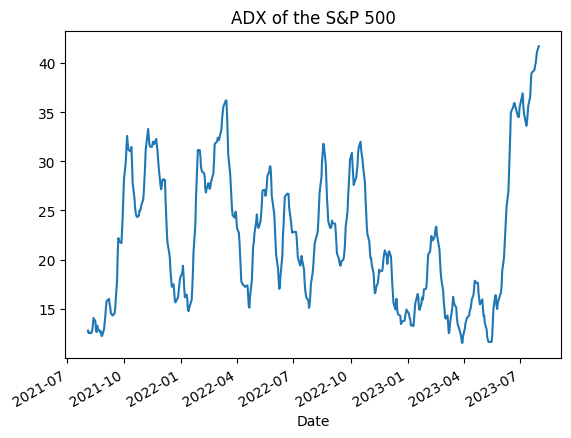

In [57]:
adx.iloc[-500:].plot()
plt.title("ADX of the S&P 500")
plt.show()

### Stochastic RSI

In [64]:
fastk, fastd = ta.STOCHRSI(close_series, timeperiod = 14, fastk_period=14, fastd_period=3)

### Noramlized Average True Range

In [72]:
natr = ta.NATR(
    data.get_series(column_name='High'), 
    data.get_series(column_name='Low'), 
    data.get_series(column_name='Close')
)

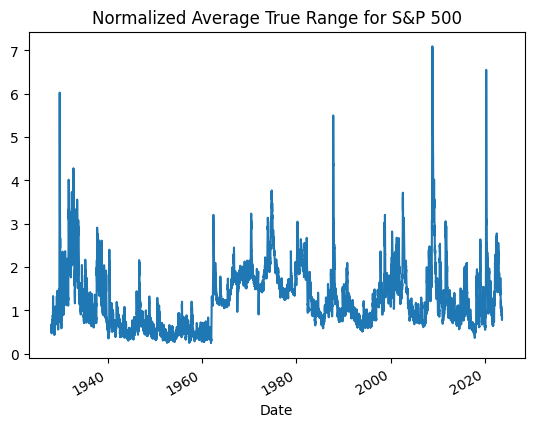

In [75]:
natr.plot()
plt.title('Normalized Average True Range for S&P 500')
plt.show()